<a href="https://colab.research.google.com/github/Killeryoung/NM/blob/main/%D0%9B_%D0%A0_%E2%84%9610_%D0%93%D1%83%D1%80%D0%BA%D0%BE_%D0%94%D0%B0%D0%BD%D0%B8%D0%BB%D0%BE_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Був присутній на парі.

**Лабораторна робота 8. Сплайни**

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt


#Варіант 1.
**Побудова кубічного сплайну.**

In [9]:

# Дані
x = np.array([0.8, 1, 1.3, 1.9, 2.3])
y = np.array([1.72, 2.35, 1.52, 2.43, 1.55])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n + 1)  # Розширюємо на один елемент для останнього індексу c[n]

alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n + 1)  # Розширюємо l на один елемент
mu = np.zeros(n)
z = np.zeros(n + 1)  # Розширюємо на один елемент

# Пряма хода для знаходження l, mu, z
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Крайова умова: c[n] = 0
l[n] = 1
z[n] = 0
c[n] = 0

# Зворотний хід для знаходження c, b, d
for j in range(n-1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайну для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

Відрізок 1:
S_0(x) = 1.72 + 4.6146(x - 0.8) + 0.0(x - 0.8)^2 + -36.616(x - 0.8)^3, x належить [0.8, 1.0]
Відрізок 2:
S_1(x) = 2.35 + 0.2207(x - 1.0) + -21.9696(x - 1.0)^2 + 40.0389(x - 1.0)^3, x належить [1.0, 1.3]
Відрізок 3:
S_2(x) = 1.52 + -2.1506(x - 1.3) + 14.0654(x - 1.3)^2 + -13.2555(x - 1.3)^3, x належить [1.3, 1.9]
Відрізок 4:
S_3(x) = 2.43 + 0.4119(x - 1.9) + -9.7946(x - 1.9)^2 + 8.1622(x - 1.9)^3, x належить [1.9, 2.3]


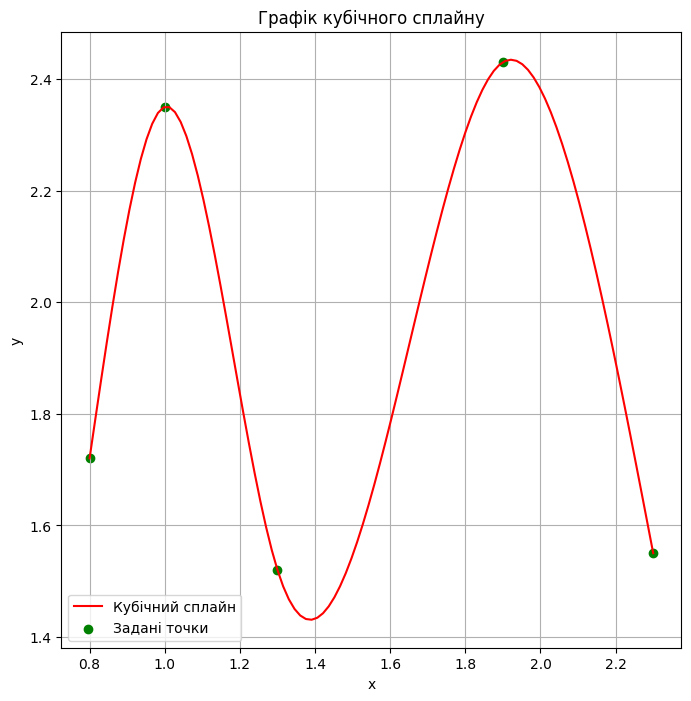

In [22]:
# Побудова графіка
x_values = np.linspace(np.min(x), np.max(x), 100)  # Діапазон для побудови графіка
y_values = [ ]# Значення сплайна

# Обчислення значень сплайна для кожного відрізка
for i in range(n):
    mask = (x_values >= x[i]) & (x_values <= x[i + 1])
    x_interval = x_values[mask]
    y_interval = a[i] + b[i] * (x_interval - x[i]) + c[i] * (x_interval - x[i]) ** 2 + d[i] * (x_interval - x[i]) ** 3
    y_values.extend(y_interval)

# Побудова графіка
plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values, label="Кубічний сплайн", color='r')
plt.scatter(x, y, label="Задані точки", color='g')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='lower left')
plt.title('Графік кубічного сплайну')
plt.grid()
plt.show()

#Варіант 2
**Перевірка за допомогою методу CubicSpline**

In [4]:
from scipy.interpolate import CubicSpline

# Вхідні дані
x = np.array([0.8, 1, 1.3, 1.9, 2.3])
y = np.array([1.72, 2.35, 1.52, 2.43, 1.55])

# Побудова кубічного сплайну
cs = CubicSpline(x, y)

# Виведення коефіцієнтів сплайну для кожного відрізка
for i in range(len(x)-1):
    coeffs = cs.c[:, i]  # Коефіцієнти для i-го інтервалу
    spline = f'S_{i+1}(x) = {coeffs[0]:.4f}*(x - {x[i]})^3 + {coeffs[1]:.4f}*(x - {x[i]})^2 + {coeffs[2]:.4f}*(x - {x[i]}) + {coeffs[3]:.4f}'
    print(spline)

S_1(x) = 29.1269*(x - 0.8)^3 + -32.2221*(x - 0.8)^2 + 8.4294*(x - 0.8) + 1.7200
S_2(x) = 29.1269*(x - 1.0)^3 + -14.7460*(x - 1.0)^2 + -0.9643*(x - 1.0) + 2.3500
S_3(x) = -9.4905*(x - 1.3)^3 + 11.4681*(x - 1.3)^2 + -1.9476*(x - 1.3) + 1.5200
S_4(x) = -9.4905*(x - 1.9)^3 + -5.6148*(x - 1.9)^2 + 1.5644*(x - 1.9) + 2.4300


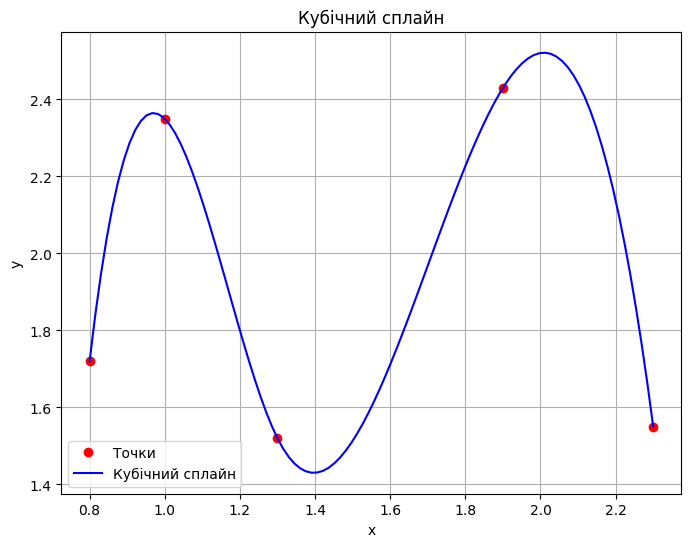

In [26]:
# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки', color='r')
plt.plot(x_new, y_new, label='Кубічний сплайн', color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

#Варіант 3. Побудова сплайну



In [6]:
def gauss(A, b):
    n = len(b)
    for i in range(n):
        # Pivoting
        max_row = max(range(i, n), key=lambda r: abs(A[r][i]))
        A[i], A[max_row] = A[max_row], A[i]
        b[i], b[max_row] = b[max_row], b[i]

        # Elimination
        for j in range(i+1, n):
            factor = A[j][i] / A[i][i]
            b[j] -= factor * b[i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]

    # Back substitution
    x = [0 for _ in range(n)]
    for i in range(n-1, -1, -1):
        sum_ax = sum(A[i][j] * x[j] for j in range(i+1, n))
        x[i] = (b[i] - sum_ax) / A[i][i]
    return x

# Таблиця значень функції
x = [0.8, 1, 1.3, 1.9, 2.3]
f = [1.72, 2.35, 1.52, 2.43, 1.55]

d = len(x)

# Створюємо нульову матрицю А та нульовий вектор b
s = [0]*4*(d-1)
A = []
for i in range(4*(d-1)):
    A.append(s[:])
b = s[:]

# Відповідність сплайнів табличним значенням функції на лівих кінцях відрізків
for j in range(d-1):
    for i in range(4):
        A[j][i+4*j] = (x[j]-x[j+1])**i
    b[j] = f[j]

# Відповідність сплайнів табличним значенням функції на правих кінцях відрізків
for j in range(d-1, 2*(d-1)):
    A[j][4*(j-(d-1))] = 1
    b[j] = f[j-(d-1)+1]

# Відповідність значень перших похідних сусідніх сплайнів
for j in range(2*(d-1), 3*d-4):
    for i in range(4):
        if i == 0:
            A[j][1+4*(j-2*(d-1))] = -1
        else:
            A[j][i+4+4*(j-2*(d-1))] = i*(x[1+(j-2*(d-1))]-x[2+(j-2*(d-1))])**(i-1)

# Відповідність значень других похідних сусідніх сплайнів
for j in range(3*d-4, 4*d-6):
    A[j][2+4*(j-(3*d-4))] = -2
    A[j][6+4*(j-(3*d-4))] = 2
    A[j][7+4*(j-(3*d-4))] = 6*(x[1+j-(3*d-4)]-x[2+j-(3*d-4)])

# Крайові умови. Визначення нульових значень других похідних на кінцях відрізка
A[4*d-6][2] = 2
A[4*d-6][3] = 6*(x[0]-x[1])
A[4*d-5][-2] = 2

# Обчислення коефіцієнтів сплайнів
c = gauss(A, b)

# Відображаємо сплайни
print('Сплайни')
for j in range(d-1):
    spline = 'S_' + str(j+1) + '(x) = ' + str(c[0+4*j]) + '+'
    for i in range(1, 4):
        spline += str(c[i+4*j]) + '*(x-' + str(x[j+1]) + ')^' + str(i) + '+'
    spline = spline[:-1].replace('+-', '-').replace('^1', '')
    spline += ', на [' + str(x[j]) + ';' + str(x[j+1]) + ']'
    print(spline)

Сплайни
S_1(x) = 2.3500000000000005+0.22071895424836763*(x-1)-21.969607843137283*(x-1)^2-36.61601307189548*(x-1)^3, на [0.8;1]
S_2(x) = 1.52-2.1505555555555573*(x-1.3)+14.065359477124195*(x-1.3)^2+40.0388525780683*(x-1.3)^3, на [1;1.3]
S_3(x) = 2.4299999999999997+0.41189542483660135*(x-1.9)-9.794607843137262*(x-1.9)^2-13.255537400145258*(x-1.9)^3, на [1.3;1.9]
S_4(x) = 1.55-3.5059477124183025*(x-2.3)+0.0*(x-2.3)^2+8.162173202614387*(x-2.3)^3, на [1.9;2.3]


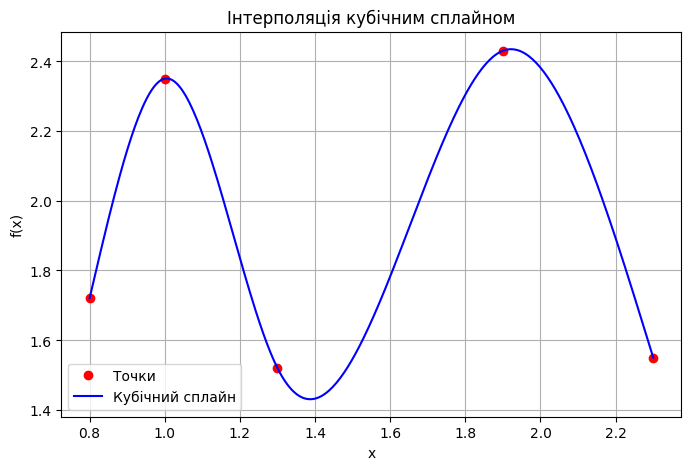

In [49]:
x = [0.8, 1, 1.3, 1.9, 2.3]
f = [1.72, 2.35, 1.52, 2.43, 1.55]

def gauss(A, b):
    n = len(b)
    for i in range(n):
        max_row = max(range(i, n), key=lambda r: abs(A[r][i]))
        A[i], A[max_row] = A[max_row], A[i]
        b[i], b[max_row] = b[max_row], b[i]
        for j in range(i+1, n):
            factor = A[j][i] / A[i][i]
            b[j] -= factor * b[i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]
    x = [0]*n
    for i in range(n-1, -1, -1):
        s = sum(A[i][j]*x[j] for j in range(i+1, n))
        x[i] = (b[i]-s)/A[i][i]
    return x

d = len(x)
s = [0]*4*(d-1)
A = [s[:] for _ in range(4*(d-1))]
b = s[:]

for j in range(d-1):
    for i in range(4):
        A[j][i+4*j] = (x[j]-x[j+1])**i
    b[j] = f[j]
for j in range(d-1, 2*(d-1)):
    A[j][4*(j-(d-1))] = 1
    b[j] = f[j-(d-1)+1]
for j in range(2*(d-1), 3*d-4):
    for i in range(4):
        if i == 0:
            A[j][1+4*(j-2*(d-1))] = -1
        else:
            A[j][i+4+4*(j-2*(d-1))] = i*(x[1+(j-2*(d-1))]-x[2+(j-2*(d-1))])**(i-1)
for j in range(3*d-4, 4*d-6):
    A[j][2+4*(j-(3*d-4))] = -2
    A[j][6+4*(j-(3*d-4))] = 2
    A[j][7+4*(j-(3*d-4))] = 6*(x[1+j-(3*d-4)]-x[2+j-(3*d-4)])
A[4*d-6][2] = 2
A[4*d-6][3] = 6*(x[0]-x[1])
A[4*d-5][-2] = 2

c = gauss(A, b)

xx = np.linspace(x[0], x[-1], 300)
yy = []

for xi in xx:
    for j in range(d-1):
        if x[j] <= xi <= x[j+1]:
            dx = xi - x[j+1]
            y_val = c[0+4*j] + c[1+4*j]*dx + c[2+4*j]*dx**2 + c[3+4*j]*dx**3
            yy.append(y_val)
            break

# === Візуалізація ===
plt.figure(figsize=(8, 5))
plt.plot(x, f, 'ro', label='Точки')
plt.plot(xx, yy, 'b-', label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Інтерполяція кубічним сплайном')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
